In [1]:
import panel as pn 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df=pd.read_csv(Path('..'+'/tsx_data.csv').resolve())
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df=df[df['Symbol'].str.contains('TSX:TD')]
fig = go.Figure()

In [4]:
# Add traces for open, high, low, close
fig.add_trace(go.Scatter(x=df.index, y=df['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=df.index, y=df['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=df.index, y=df['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'))

In [5]:
# Add bar trace for volume on a separate y-axis
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume', yaxis='y2'))

In [6]:
# Create a layout with 2 y-axes
fig.update_layout(
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Volume', overlaying='y', side='right'),
    title='Stock Price and Volume Over Time',
    xaxis=dict(title='Date'))

In [7]:
from datetime import datetime, timedelta

In [8]:
# Calculate the date 3 months ago
three_months_ago = datetime.now() - timedelta(days=90)

# Filter the DataFrame to include only the last 3 months
df_last_3_months = df[df['Date'] > three_months_ago]

fig = go.Figure(data=[go.Candlestick(x=df_last_3_months['Date'],
                open=df_last_3_months['Open'], high=df_last_3_months['High'],
                low=df_last_3_months['Low'], close=df_last_3_months['Close'],
                name='Price')])

fig.update_layout(height=600, width=1000, title_text="Candlestick Chart - Last 3 Months")

pane2=pn.pane.Plotly(fig)

In [9]:
# Calculate the date 3 months ago
three_months_ago = datetime.now() - timedelta(days=90)

# Filter the DataFrame to include only the last 3 months
df_last_3_months = df[df['Date'] > three_months_ago]

fig = go.Figure(data=[go.Candlestick(x=df_last_3_months['Date'],
                open=df_last_3_months['Open'], high=df_last_3_months['High'],
                low=df_last_3_months['Low'], close=df_last_3_months['Close'],
                name='Price')])

fig.update_layout(height=600, width=1000, title_text="Candlestick Chart - Last 3 Months")
pane2=pn.pane.Plotly(fig)

In [10]:
# 2. Line Plot for Closing Prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'))
fig.update_layout(title='Closing Price Over Time', xaxis_title='Date', yaxis_title='Price')

In [11]:
# df = df.reset_index()
df

,Date,Open,High,Low,Close,Volume,Symbol
4951,2024-09-25,85.31,85.53,84.79,84.82,8939777,TSX:TD
4952,2024-09-24,86.32,86.47,85.70,85.74,9513600,TSX:TD
4953,2024-09-23,87.39,87.49,86.10,86.31,9171000,TSX:TD
4954,2024-09-20,87.32,87.99,86.77,87.55,13303700,TSX:TD
4955,2024-09-19,86.00,87.60,86.00,87.32,16719000,TSX:TD
...,...,...,...,...,...,...,...
9900,2005-01-10,48.60,49.15,48.44,49.09,2573134,TSX:TD
9901,2005-01-07,49.23,49.45,48.36,48.75,2787392,TSX:TD
9902,2005-01-06,49.37,49.46,49.07,49.20,1625260,TSX:TD
9903,2005-01-05,49.81,49.95,49.40,49.42,2854646,TSX:TD


<Figure size 1200x600 with 0 Axes>

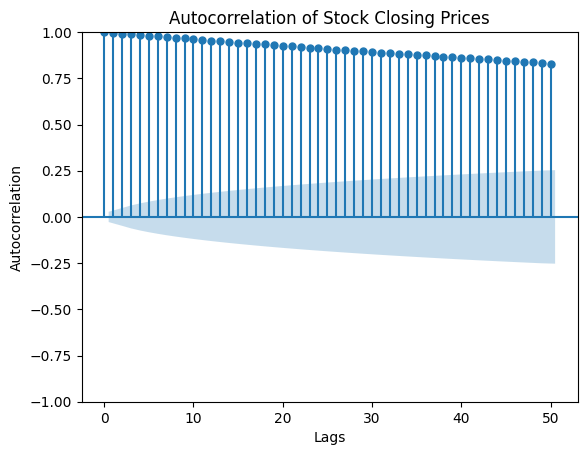

In [12]:
# Set 'Date' column as the index (if not already done)
# df.reset_index('Date', inplace=True)

# Plot Autocorrelation Function (ACF) for 'Close' prices
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)  # You can adjust lags depending on the timeframe
plt.title('Autocorrelation of Stock Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
# 3. Area Plot for Price Range
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], fill=None, mode='lines', line_color='rgba(0,100,80,0.2)', name='High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], fill='tonexty', mode='lines', line_color='rgba(0,100,80,0.2)', name='Low'))
fig.update_layout(title='Price Range Over Time', xaxis_title='Date', yaxis_title='Price')

In [14]:
# 4. Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA50'], mode='lines', name='50-day MA'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA200'], mode='lines', name='200-day MA'))
fig.update_layout(title='Closing Price with Moving Averages', xaxis_title='Date', yaxis_title='Price')

pane1 = pn.pane.Plotly(fig,sizing_mode='stretch_both')

In [15]:
# 5. Relative Strength Index (RSI)
def compute_rsi(data, time_window):
    '''
    Compute the Relative Strength Index (RSI) for a given time window.

    Parameters:
    data (pd.Series): The time series data.
    time_window (int): The time window for calculating RSI.

    Returns:
    pd.Series: The RSI values.

    
    '''
    diff = data.diff(1).dropna()
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[diff > 0]
    down_chg[diff < 0] = -diff[diff < 0]
    up_chg_avg = up_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    rs = up_chg_avg / down_chg_avg
    rsi = 100 - 100 / (1 + rs)
    return rsi

df['RSI'] = compute_rsi(df['Close'], 14)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Closing Price', 'RSI'), 
                    row_width=[0.7, 0.3])

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], mode='lines', name='RSI'),
              row=2, col=1)

fig.update_layout(height=600, width=1000, title_text="Closing Price and RSI")
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)


df_pane = pn.pane.Perspective(df, sizing_mode='stretch_both')